In [70]:
import numpy as np
import pennylane as qml
from utility import *
from openfermion.utils import get_ground_state
from openfermion.transforms import get_sparse_operator

In [79]:
bond_lengths = np.linspace(0.2,2.5,15)
gro = np.zeros(15)
for i in range(15):
    geometry = get_molecular_data('h2o_pennylane', bond_lengths[i], xyz_format=False)[2:]
    name = 'water'
    charge = 0
    multiplicity = 1
    basis_set = 'sto-3g'
    hf_data = qml.qchem.meanfield_data(name, geometry, charge, multiplicity, basis_set, qc_package='pyscf')
    d_occ_indices, active_indices = qml.qchem.active_space(name, hf_data, n_active_electrons=4, n_active_orbitals=4)
    no_d_occ, all_active = qml.qchem.active_space(name, hf_data)
    qubit_hamiltonian = qml.qchem.decompose_hamiltonian(
        name,
        hf_data,
        mapping='jordan_wigner',
        docc_mo_indices=d_occ_indices,
        active_mo_indices=active_indices
    )

    qubit_transf = 'jw'
    tap = taper_hamiltonian(qubit_hamiltonian, n_spin_orbitals=14, n_electrons=10, qubit_transf=qubit_transf)
    sparse = get_sparse_operator(tap)
    gro[i] = get_ground_state(sparse)[0]
    print("Energía:", gro[i])

Energía: -56.17941494505153
Energía: -69.87420089837074
Energía: -73.49404037123733
Energía: -74.59981945451598
Energía: -74.92106859796003
Energía: -74.96991384201736
Energía: -74.91794722337472
Energía: -74.83257401085204
Energía: -74.74122535970575
Energía: -74.80936494348765
Energía: -74.7764267213408
Energía: -74.75679596748176
Energía: -74.7466444088962
Energía: -74.74160063963055
Energía: -74.6404588083122


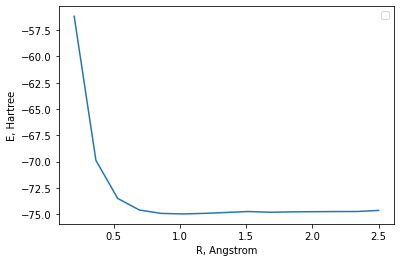

In [87]:
import matplotlib.pyplot as plt

plt.xlabel('R, Angstrom')
plt.ylabel('E, Hartree')
plt.plot(bond_lengths, gro)
plt.legend()
